In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step)
y = weight * X + bias

In [4]:
X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [5]:
X[:10]

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800])

In [6]:
y[:10]

tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260])

In [7]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test),




(40, 40, 10, 10)

In [8]:
train_split

40

C:\Users\judyb\AppData\Local\Temp\ipykernel_14224\1944565560.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop={"size":14})


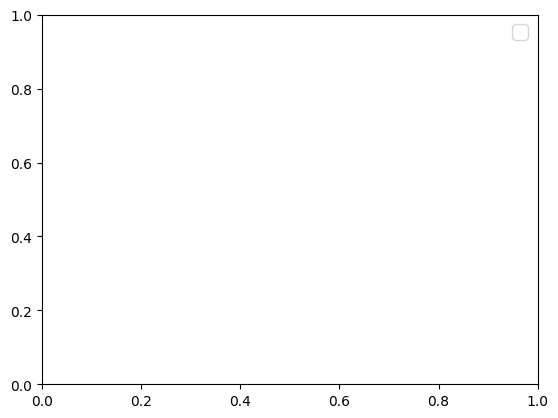

In [9]:
def plot_prediction(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Prediction")

plt.legend(prop={"size":14})



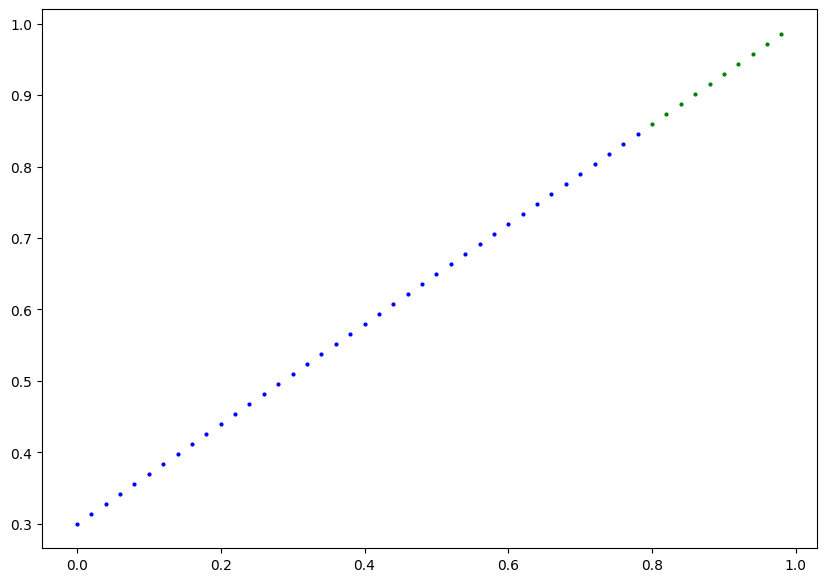

In [10]:
plot_prediction()

In [11]:
X_test.shape

torch.Size([10])

In [12]:
X_train.shape

torch.Size([40])

In [13]:
y_train.shape, y_test.shape

(torch.Size([40]), torch.Size([10]))

In [14]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

In [48]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True,
                                                 dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True,
                                             dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias 
        

In [49]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [50]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [51]:
weight, bias

(0.7, 0.3)

In [52]:
# making predictions using 'torch.inference_model()
with torch.inference_mode():
    y_pred = model_0(X_test)



In [53]:
y_pred

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

In [54]:
y_pred.shape

torch.Size([10])

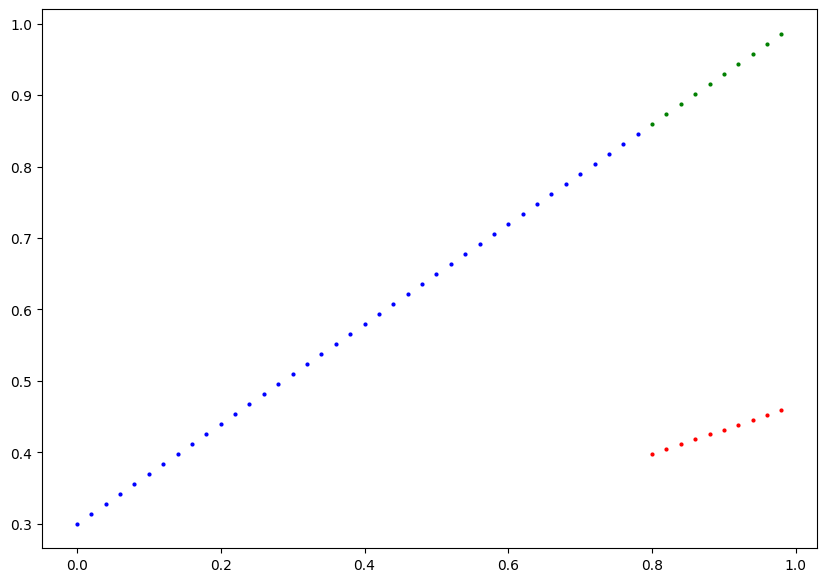

In [55]:
plot_prediction(test_data=X_test, predictions=y_pred)

In [56]:
with torch.no_grad():
    y_pred = model_0(X_test)

In [57]:
y_pred

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

In [58]:
# setup an optimizer(stochastic gradient descent)
loss_fn = nn.L1Loss()

In [59]:
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [27]:
# building a taining loop
# 1. loop through the data
# 2. forward pass (this involves data moving through our model's forward() function) to make predictions
# 3. calculate the loss (compare forward pass predictions to ground truth labels)
# 4. optimizer zero gradient
# 5. loss backward - move backwards through the network to calculate the gradients of each of the parameters
# of our model with respect to the loss
# 6. optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss


In [64]:
# an epoch is one loop through the data
torch.manual_seed(42)

epochs = 160
# track experiment
epoch_count = []
loss_value = []
test_loss_value = []
# 1.loop throught the data
for epoch in range(epochs):
    # set the model to training mode, it sets all parameters that requires gradient to require gradient
    model_0.train() 
    # 2. forward pass
    y_pred = model_0(X_train)
    # model_0.eval() turns off gradient tracking
    # 3. calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 4. optimizer zero gradient
    optimizer.zero_grad()
    # 5. perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    # 6. step the optimizer (performs gradient descent)
    optimizer.step()
       
    # testing
    # turns off different settings in the model not needed for evaluation/testing
    model_0.eval()
    # turns off gradiet tracking and other things
    with torch.inference_mode():
        # do the forward pass
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:   
        epoch_count.append(epoch)
        loss_value.append(loss)
        test_loss_value.append(test_loss)
        print(f"epoch: {epoch}, loss: {loss}, test_loss: {test_loss}")

        print(model_0.state_dict())
        


epoch: 0, loss: 0.0038517764769494534, test_loss: 0.008201557211577892
OrderedDict([('weights', tensor([0.6826])), ('bias', tensor([0.3073]))])
epoch: 10, loss: 0.008932482451200485, test_loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
epoch: 20, loss: 0.008932482451200485, test_loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
epoch: 30, loss: 0.008932482451200485, test_loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
epoch: 40, loss: 0.008932482451200485, test_loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
epoch: 50, loss: 0.008932482451200485, test_loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
epoch: 60, loss: 0.008932482451200485, test_loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.29

In [65]:
epoch, loss_value, test_loss_value

(159,
 [tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

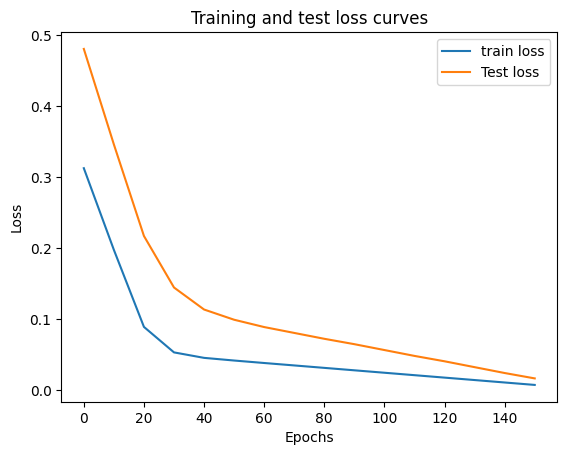

In [63]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(epoch_count, np.array(torch.tensor(loss_value).numpy()), label="train loss")
plt.plot(epoch_count, test_loss_value, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [30]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

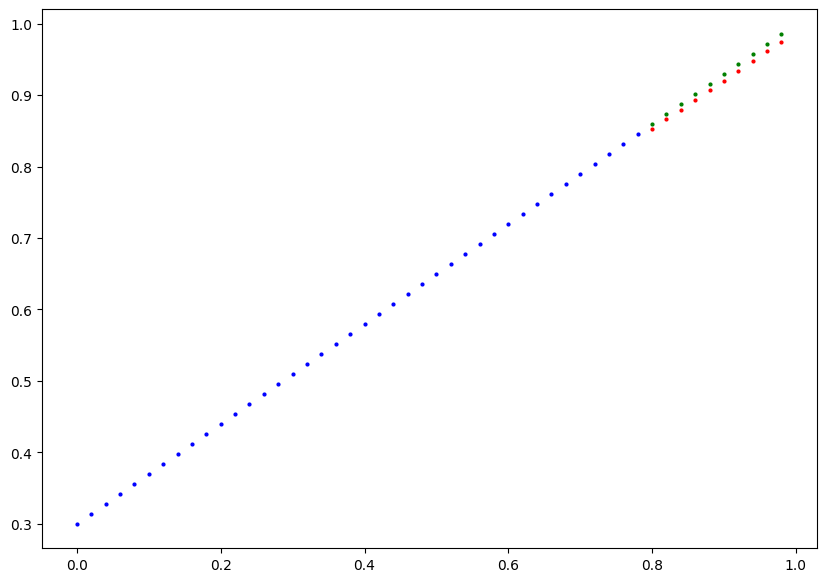

In [31]:
plot_prediction(predictions=y_pred_new)

# saving a model in Pytorch
there are three main ways of saving and loading models in pytorch

1.`torch.save()` - allows you save a pytorch object in pickle format

2.`torch.load()` - allows you load a saved pytorch object

3.`torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary

In [ ]:
model_0.state_dict()